# **Title of the Project**


---

# **Wine Quality Prediction**

**Objective**

The main objective of this project is to analyze the quality of red wine based on the components included in the wine. The dataset with approximately 1600 rows is analysed to predict the quality from the % composition of its components.

**Dataset**

https://github.com/YBIFoundation/Dataset/raw/main/RedWineQuality.csv

**Import libraries**


*   Numpy - Fast-array processing
*   Pandas - Data Cleaning and Exploratory Data Analysis
*   Matplotlib - Data visualization
*   Seaborn - Advannced Data visualization
*   Scipy - Statistical calculations
*   Scikit-learn - Machine Learning and Prediction Analytics







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

**Import Data**

In [ ]:
wine_quality_df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/RedWineQuality.csv',sep=';')
wine_quality_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Describe Data**

In [ ]:
wine_quality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
print(wine_quality_df.columns)
print(wine_quality_df.dtypes)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


**Finding and replacing missing values**

In [ ]:
wine_quality_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Interpretation:** The above result shows that there are no missing values in the given dataset.

**Finding Duplicated Records**

In [ ]:
wine_quality_df.duplicated().sum()

240

Interpretation: The above result shows that there are 240 duplicated records.
So we remove the duplicates to ensure our model is accurate enough to predict the quality of wine.

In [ ]:
wine_quality_df.drop_duplicates(keep="first", inplace=True)
print(wine_quality_df.duplicated().sum())
print(wine_quality_df.shape)

0
(1359, 12)


**Interpretation:** After removing duplicates, our dataset has 1359 unique records.

**Exploratory Data Analysis**

Here, we explore and analyze the relationship between various components of wine with quality.

In [ ]:
X = wine_quality_df.drop('quality', axis=1)
X_list = X.columns.tolist()
print(X_list)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
wine_quality_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [ ]:
wine_quality_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

**Interpretation:** Here, we found the correlation between quality and components of wine. Then it is sorted to find which variable is strongly correlated.
From the above result, **alcohol is strongly correlated** than others with wine **quality**.

**Visualizing the correlation matrix**

<Axes: >

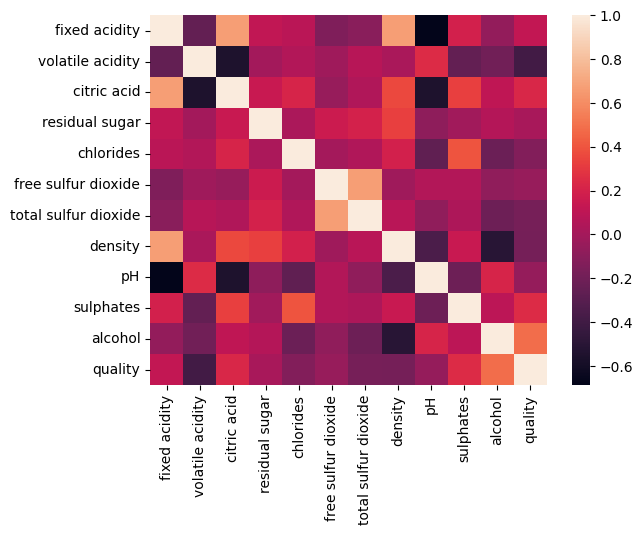

In [ ]:
sns.heatmap(wine_quality_df.corr())

**Data Visualization**

**1. Comparision of the variation of quality with alcohol.**

<Axes: xlabel='quality', ylabel='alcohol'>

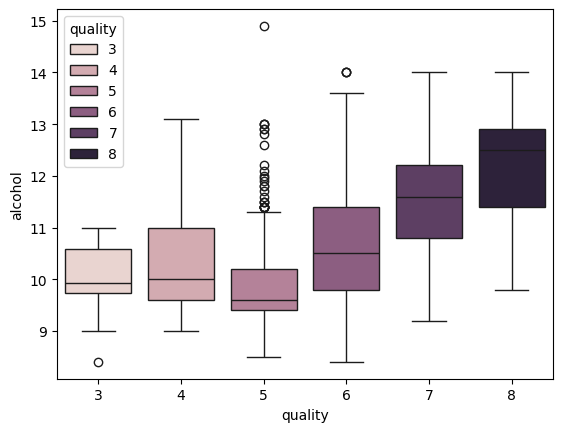

In [ ]:
sns.boxplot(x='quality',y='alcohol',data=wine_quality_df,hue='quality')

**Interpretation:** The alcohol composition is having more outliers when the wine's quality is 5.

**2. Estimate the effect of sulphates and alcohol on pH.**

<Axes: xlabel='alcohol', ylabel='pH'>

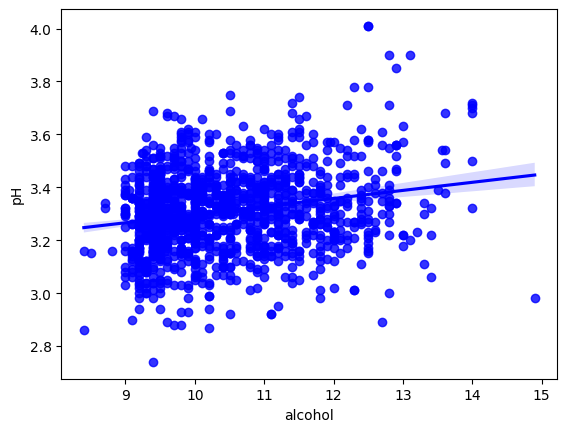

In [ ]:
sns.regplot(x='alcohol',y='pH',data=wine_quality_df,color='blue')

<Axes: xlabel='sulphates', ylabel='pH'>

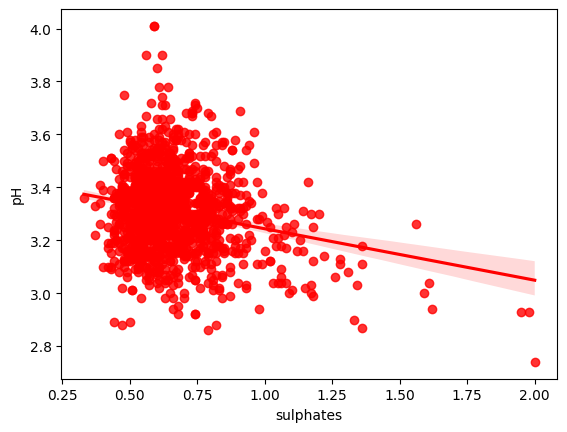

In [ ]:
sns.regplot(x='sulphates',y='pH',data=wine_quality_df,color='red')

**Interpretation:** The first plot shows the relation between alcohol and pH. It proves that there is positive correlation between alcohol and pH. Conversely, in the second plot, there is negative correlation between sulphates and pH.
We are aware that the increase in pH tends to basicity while decrease in pH tends to acidity.

**3. Count the number of wines with various levels of citric acid in the wines.**

<Axes: xlabel='citric acid', ylabel='Count'>

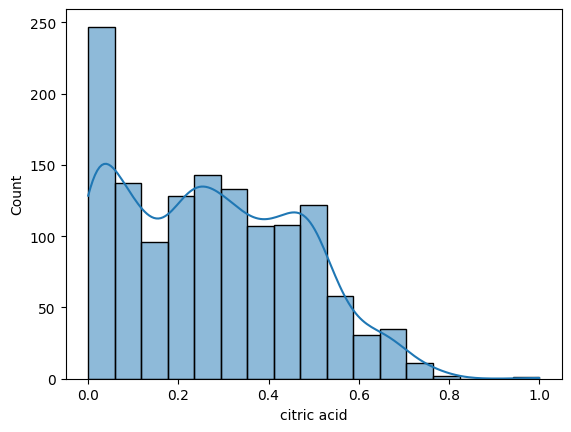

In [ ]:
sns.histplot(wine_quality_df['citric acid'],kde=True)

**Interpretation:** The above plot shows that there are approximately 250 wines with no citric acid and the trend decreases with increase in citric acid composition.

**Data Preprocessing**

This is the crucial step in order to train the model for predictions. We use normalization, standardization, binning, labelling etc. techniques to keep the entire data in the same range.

**Detecting and Handling Outliers**

In [ ]:
quantile1 = wine_quality_df['alcohol'].quantile(0.25)
median = wine_quality_df['alcohol'].quantile(0.5)
quantile3 = wine_quality_df['alcohol'].quantile(0.75)
IQR = quantile3 - quantile1

lower_l = quantile1 - 1.5*IQR
upper_l = quantile3 + 1.5*IQR

outliers = [x for x in wine_quality_df['alcohol'] if x < lower_l or x > upper_l]
print(outliers)

[14.0, 14.0, 14.0, 14.9, 14.0, 13.6, 13.6, 13.6, 14.0, 14.0, 13.5666666666667, 13.6]


**Normalization and Standardization**

In [ ]:
# Min-max normmalization
scaler = MinMaxScaler()

wine_quality_df = pd.DataFrame(scaler.fit_transform(wine_quality_df),columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality'])
wine_quality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0.194690,0.342466,0.08,0.068493,0.093489,0.380282,0.113074,0.472834,0.535433,0.293413,0.169231,0.6
1355,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1356,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1357,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [ ]:
# Z-Score normmalization
scaler = StandardScaler()

wine_quality_df = pd.DataFrame(scaler.fit_transform(wine_quality_df),columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality'])
wine_quality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,-0.757040
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,-0.757040
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,-0.757040
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,0.457621
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,-0.757040
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.869983,0.494756,-0.983977,-0.461157,-0.407702,1.159265,-0.264277,-0.106490,0.711149,0.945435,-0.861924,0.457621
1355,-1.215536,0.385444,-0.983977,-0.387183,0.038015,1.542281,-0.084619,-0.968269,0.904724,-0.461331,0.062574,-0.757040
1356,-1.388312,0.112167,-0.881656,-0.239233,-0.529261,2.212559,0.124983,-0.850510,1.356397,0.593744,0.709723,0.457621
1357,-1.388312,0.631395,-0.779336,-0.387183,-0.265883,1.542281,-0.084619,-0.663167,1.679021,0.300667,-0.214775,-0.757040


**Define Target(y) and Predictors(x)**



In [ ]:
x = wine_quality_df[['alcohol','sulphates','citric acid']]
y = wine_quality_df['quality']

**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(951, 3) (408, 3) (951,) (408,)


**Modeling**

As, the main objective is to predict quality, we need to refer to the datatype of quality. Here it is numeric yet it is categorical.
Hence we prefer **Logistic Regression** over Linear Regression.

In [ ]:
# Create model
lm1 = LogisticRegression(max_iter=10000)
# Fit the training set to the model
lm1.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

**Prediction using testing data**

In [ ]:
y_predict = lm1.predict(x_test)
y_predict[0:5]

array([6, 5, 5, 6, 6])

**Distribution of actual quality vs predicted quality**

<ipython-input-11-8c3f262a8b8a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="blue", label="Actual Quality of wines")
<ipython-input-11-8c3f262a8b8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict, hist=False, color="yellow",label

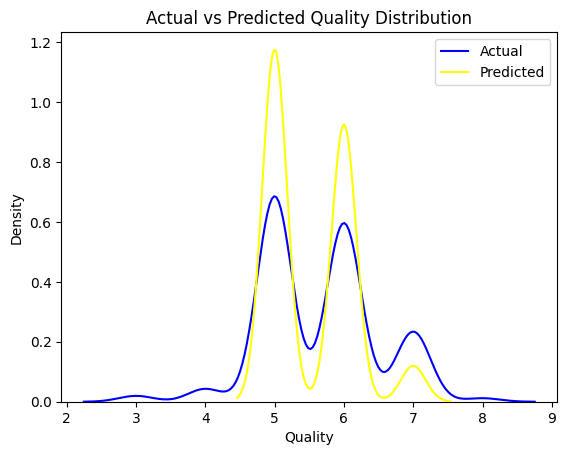

In [ ]:
ax1 = sns.distplot(y_test, hist=False, color="blue", label="Actual Quality of wines")
sns.distplot(y_predict, hist=False, color="yellow",label="Predicted Quality of wines", ax=ax1)
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('Actual vs Predicted Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()

**Interpretation:** The above graph clearly shows that the quality of wines ranging between 4 and 6 are highly predicted based on the given dataset.

**Model Evaluation Metrics**

Here evaluation metrics such as accuracy score, classification report, confusion matrix etc. are used to evaluate the accuracy level of the trained model.

In [ ]:
print('MSE of the model is ', mean_squared_error(y_test,y_predict))
print('R-squared of the model is ', r2_score(y_test,y_predict))

MSE of the model is  0.6985294117647058
R-squared of the model is  -0.0033912345647053588


In [ ]:
print('Accuracy Score of the model is ', accuracy_score(y_test,y_predict))
print('Confusion Matrix of the model is \n', confusion_matrix(y_test,y_predict))

Accuracy Score of the model is  0.5171568627450981
Confusion Matrix of the model is 
 [[  0   0   3   2   0   0]
 [  0   0   6   5   0   0]
 [  0   0 129  44   3   0]
 [  0   0  67  75  11   0]
 [  0   0  11  42   7   0]
 [  0   0   0   2   1   0]]


In [ ]:
print('Classification Report of the model is ', classification_report(y_test,y_predict))

Classification Report of the model is                precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        11
           5       0.60      0.73      0.66       176
           6       0.44      0.49      0.46       153
           7       0.32      0.12      0.17        60
           8       0.00      0.00      0.00         3

    accuracy                           0.52       408
   macro avg       0.23      0.22      0.22       408
weighted avg       0.47      0.52      0.48       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Prediction from input data**


In [ ]:
input = np.array([8.69,0.99, 0.6, 3.5, 0.44, 30.05, 50.23, 0.9974, 3.10, 0.50, 14.00]).reshape(-1,11)
input1 = np.array([9.35,0.55, 0.33, 3.2, 0.08, 10.05, 20.15, 0.9993, 2.82, 0.55, 12.55]).reshape(-1,11)
wine_quality = lm1.predict(np.concatenate((input,input1)))
print(wine_quality)

[8 6]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Explanation:**
From the above data analysis, I have understood some key points. They include

*   The major factors affecting the *wine quality are alcohol, sulphates, citric acid, fixed acididty levels.*
*   Most of the wines listed in the given dataset have their *quality either 5 or 6*.
*   The *alcohol level* in wines of quality greater than 6 *is more than 10*.
*   There are many outliers for each attribute with quality 5.
*   There is negative correlation between chlorides and quality of wines.
*   The model is 56% accurate when Logistic Regression is used.